# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [10]:
import pandas as pd 

# To avoid consistency errors, copy the results from each server to 
# separate directories. The files from these directories are merged here.

icarus_experiments = pd.read_csv("results/icarus/experiments.csv", delimiter=";")
romulus_experiments = pd.read_csv("results/romulus/experiments.csv", delimiter=";")
experiments = pd.concat([icarus_experiments, romulus_experiments], ignore_index=True)

icarus_events = pd.read_csv("results/icarus/events.csv", delimiter=";")
romulus_events = pd.read_csv("results/romulus/events.csv", delimiter=";")
events = pd.concat([icarus_events, romulus_events], ignore_index=True)

icarus_fitness_values = pd.read_csv("results/icarus/fitness_values.csv", delimiter=";")
romulus_fitness_values = pd.read_csv("results/romulus/fitness_values.csv", delimiter=";")
fitness_values = pd.concat([icarus_fitness_values, romulus_fitness_values], ignore_index=True)

In [11]:
# Remove potential trailing white spaces from column names
experiments.columns = experiments.columns.str.strip()
events.columns = events.columns.str.strip()
fitness_values.columns = fitness_values.columns.str.strip()

In [12]:
from datetime import datetime

experiments["created_at"] = experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
events["created_at"] = events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
fitness_values["created_at"] = fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [13]:
def extract_fitness(fitness: str) -> str:
    fitness = fitness.split()[0]
    fitness = fitness.split(".")[-1]
    return fitness

experiments["fitness"] = experiments["fitness"].apply(lambda x: extract_fitness(x))

In [14]:
experiments = experiments.sort_values(by=["created_at"], ascending=True)
events = events.sort_values(by=["created_at"], ascending=True)
fitness_values = fitness_values.sort_values(by=["created_at"], ascending=True)

## Visualize Fitness Value Changes By Experiment

In [15]:
experiments

,experiment_id,description,ga_params,gate_set,fitness,fitness_params,optimizer,optimizer_params,created_at,last_commit_id
0,grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f...,Experiment run without any treatments,"GAParams(population_size=1000, generations=100...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",SpectorFitness,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-04 14:22:26.603405,8990c9f37155b5689eaad409ca26e09c490563bd
1,grover_3qubits_8ea564a1-9540-4f2a-91c6-5b75a73...,Base line fitness function with abstraction l...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",SpectorFitness,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-07 13:33:40.841359,88b6ac7d2613aaf1d18d8fb15419acb6668d0905
2,grover_3qubits_aef07767-5f4e-4b2c-b1bb-10d6dd2...,,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-11 16:28:47.227048,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
8,grover_3qubits_72e16cce-5c1f-4815-ab03-39a5d74...,,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-11 18:34:13.208962,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
3,grover_3qubits_fa1eb100-f663-4164-8317-b06eba5...,,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-13 18:47:00.607497,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
9,grover_3qubits_0f7bf48d-1294-45df-b64c-adc315c...,,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-14 12:15:03.100021,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
4,grover_3qubits_9f82f56e-f02f-49f6-8dbd-0ea4df6...,abstraction learning enabled,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-18 19:41:07.431088,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
5,grover_3qubits_d6261ea0-da3b-4ff4-9858-20b0dd4...,abstraction learning enabled,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-18 19:42:57.930130,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
10,grover_3qubits_860d597d-47cd-4621-b164-8dc6ca5...,abstraction learning enabled,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-18 19:44:55.042513,5b6476b518fb05d9d476a2d63d1b8df75b6e8c73
6,grover_3qubits_7978877f-1d29-43fd-b6b4-f72d605...,abstraction learning enabled,"GAParams(population_size=1000, generations=10...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_chec

Experiment Id: grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f8d669
	Description: Experiment run without any treatments
	Fitness Function: SpectorFitness
	2024-04-04 14:24:30.161253 - 2024-04-06 16:17:42.894421


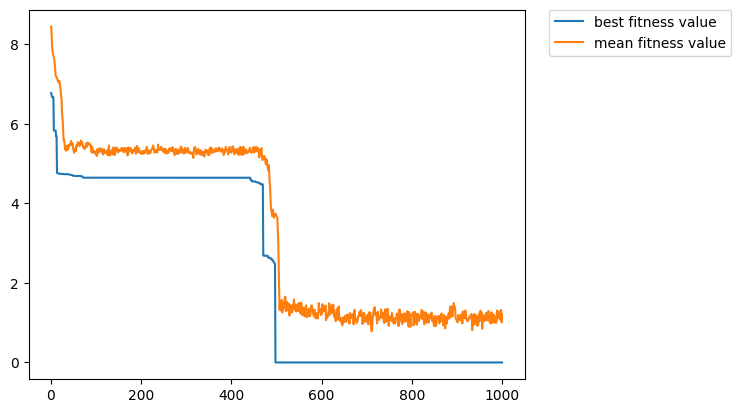

Experiment Id: grover_3qubits_8ea564a1-9540-4f2a-91c6-5b75a734f852
	Description: Base line fitness function with abstraction learning enabled.
	Fitness Function: SpectorFitness
	2024-04-07 13:35:55.946408 - 2024-04-11 16:19:48.550478


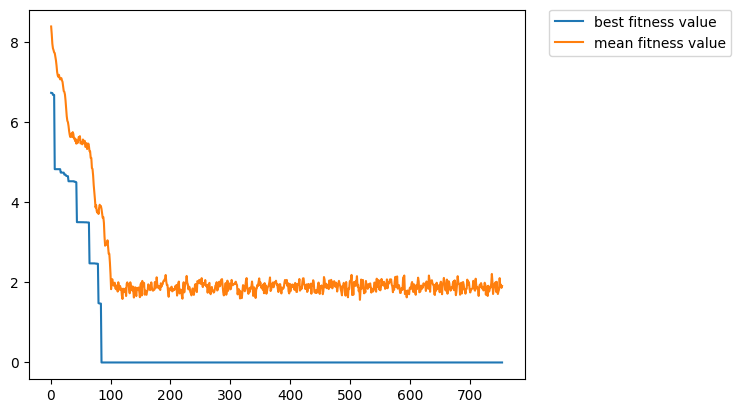

Experiment Id: grover_3qubits_aef07767-5f4e-4b2c-b1bb-10d6dd25dec1
	Description: 
	Fitness Function: BaselineFitness
	2024-04-11 16:30:40.650792 - 2024-04-13 06:30:49.384770


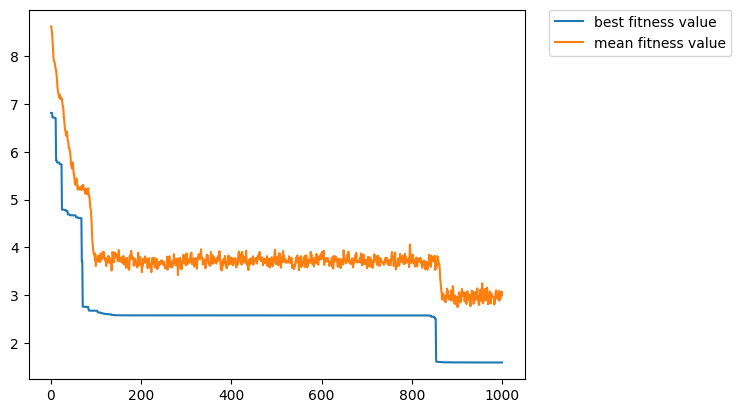

Experiment Id: grover_3qubits_72e16cce-5c1f-4815-ab03-39a5d7456d7d
	Description: 
	Fitness Function: IndirectQAFitness
	2024-04-11 18:37:42.786482 - 2024-04-14 05:20:52.468812


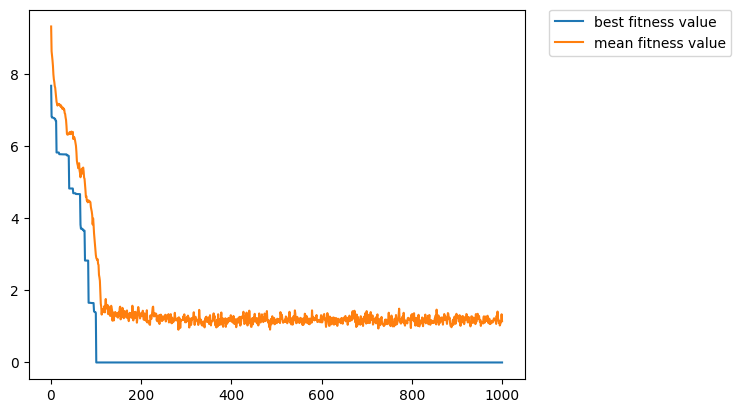

Experiment Id: grover_3qubits_fa1eb100-f663-4164-8317-b06eba5ceb23
	Description: 
	Fitness Function: BaselineFitness
	2024-04-13 18:48:57.111045 - 2024-04-15 17:50:44.284096


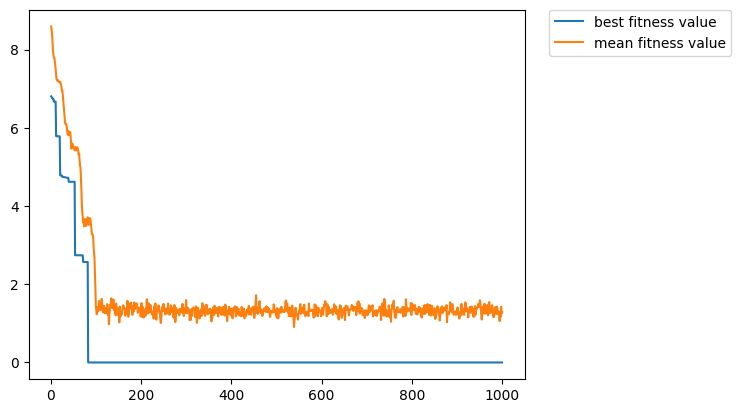

Experiment Id: grover_3qubits_0f7bf48d-1294-45df-b64c-adc315cab2a1
	Description: 
	Fitness Function: IndirectQAFitness
	2024-04-14 12:18:20.407870 - 2024-04-17 16:03:12.684640


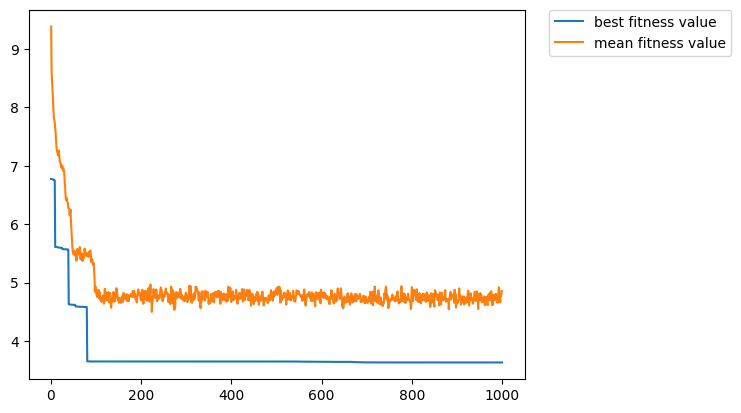

Experiment Id: grover_3qubits_9f82f56e-f02f-49f6-8dbd-0ea4df6e960a
	Description: abstraction learning enabled
	Fitness Function: BaselineFitness
	NaT - NaT


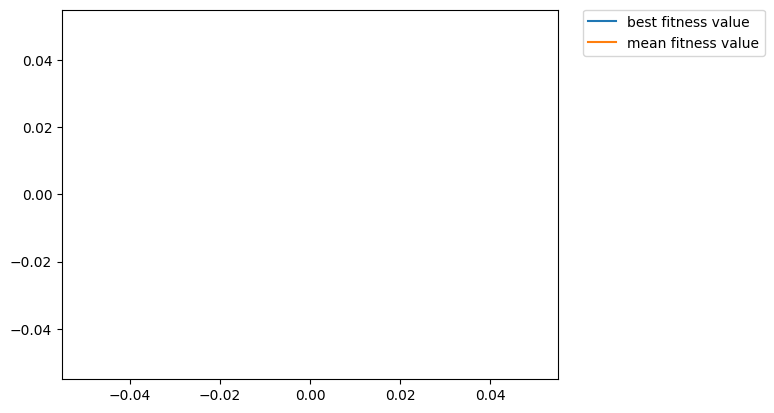

Experiment Id: grover_3qubits_d6261ea0-da3b-4ff4-9858-20b0dd426f1a
	Description: abstraction learning enabled
	Fitness Function: BaselineFitness
	2024-04-18 19:44:45.829149 - 2024-04-22 12:50:27.170009


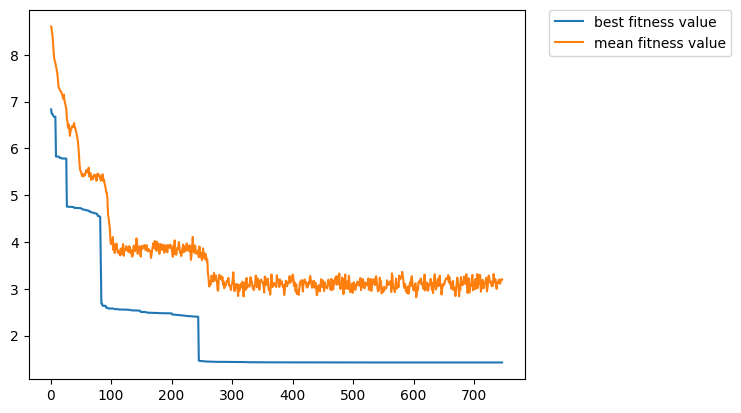

Experiment Id: grover_3qubits_860d597d-47cd-4621-b164-8dc6ca58590e
	Description: abstraction learning enabled
	Fitness Function: IndirectQAFitness
	2024-04-18 19:48:20.805541 - 2024-04-22 12:54:20.255189


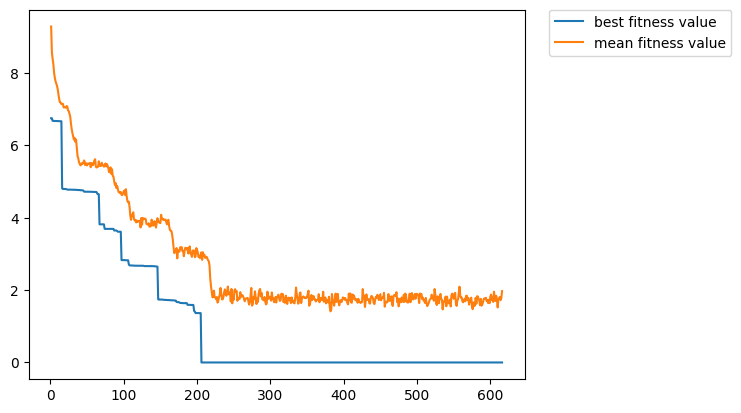

Experiment Id: grover_3qubits_7978877f-1d29-43fd-b6b4-f72d60593503
	Description: abstraction learning enabled
	Fitness Function: BaselineFitness
	2024-04-22 12:59:18.924202 - 2024-04-22 13:17:57.667782


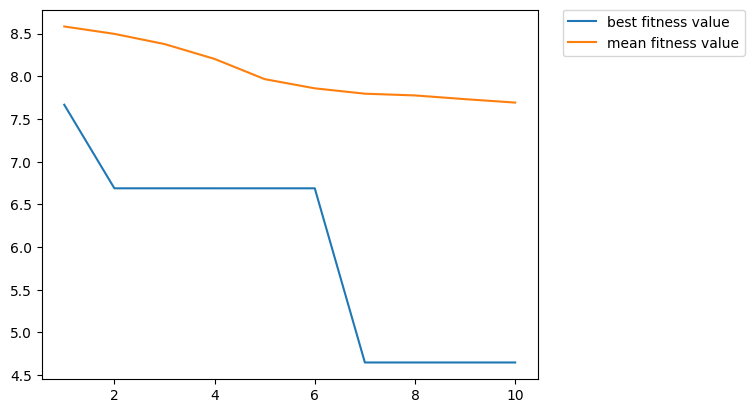

Experiment Id: grover_3qubits_0f633df0-5876-4399-93ae-d0799c78cf18
	Description: abstraction learning enabled
	Fitness Function: IndirectQAFitness
	2024-04-22 13:04:04.197496 - 2024-04-22 13:18:31.667921


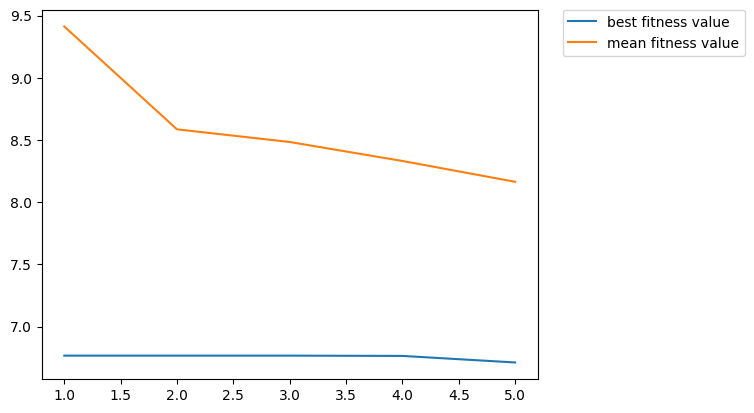

Experiment Id: grover_3qubits_f4b269ee-cb63-4e31-a401-28063e4e71ea
	Description: abstraction learning enabled
	Fitness Function: BaselineFitness
	2024-04-22 13:26:37.034580 - 2024-04-22 13:32:51.065800


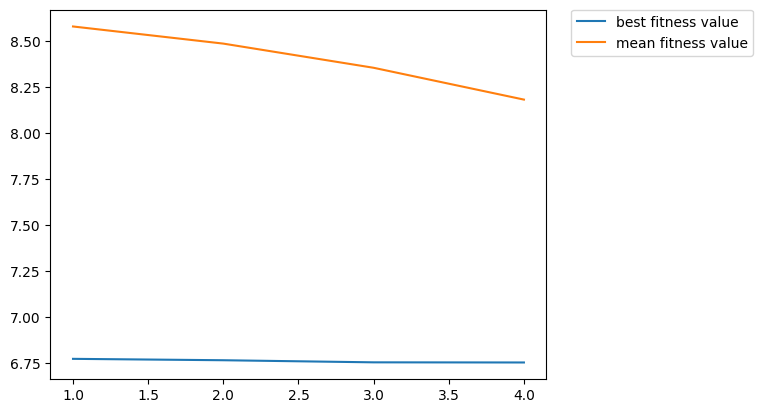

Experiment Id: grover_3qubits_b6a44a3a-ad3a-4410-81f2-92808078ffef
	Description: abstraction learning enabled
	Fitness Function: IndirectQAFitness
	2024-04-22 13:30:11.194979 - 2024-04-22 13:33:49.974434


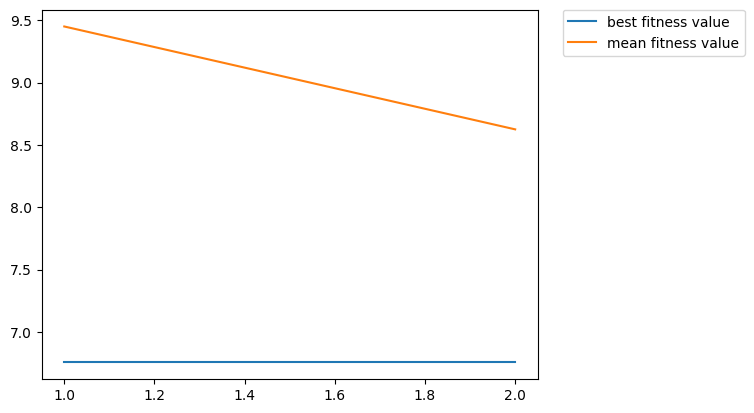

In [16]:
from matplotlib import pyplot as plt

experiment_ids = experiments["experiment_id"].unique()

for experiment_id in experiment_ids:
    description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()
    fitness = experiments.loc[experiments["experiment_id"] == experiment_id]["fitness"].tolist()[0].strip()
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
 
    ax = plt.subplot()
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
    
    print(f"Experiment Id: {experiment_id}")
    print(f"\tDescription: {description}")
    print(f"\tFitness Function: {fitness}")
    print(f"\t{current_fitness_values['created_at'].min()} - {current_fitness_values['created_at'].max()}")
    
    plt.legend(["best fitness value", "mean fitness value"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Visualize Fitness Value Changes Accross Experiments

Development of best fitness values:


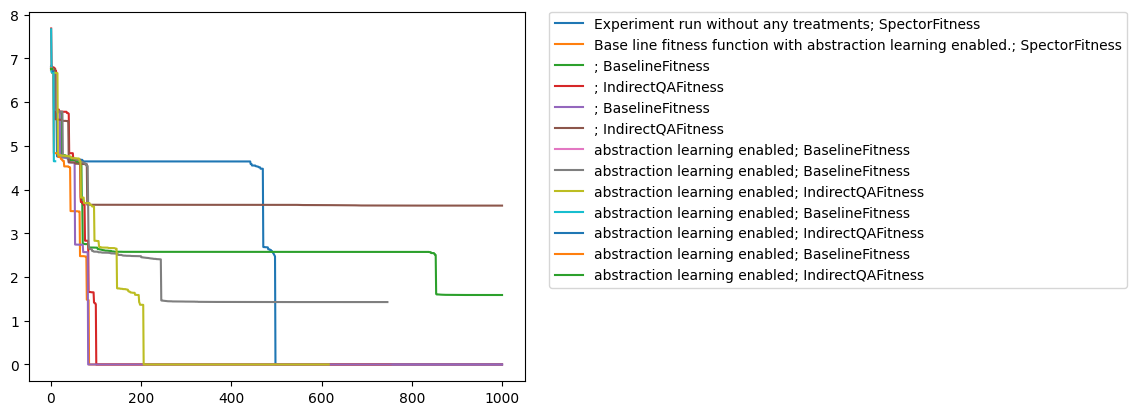

In [17]:
experiment_ids = experiments["experiment_id"].unique()
legend = []

ax = plt.subplot()

for experiment_id in experiment_ids:
    description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()
    fitness = experiments.loc[experiments["experiment_id"] == experiment_id]["fitness"].tolist()[0].strip()
    
    legend.append(f"{description}; {fitness}")
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
    
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])

print("Development of best fitness values:")
plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Development of mean fitness values:


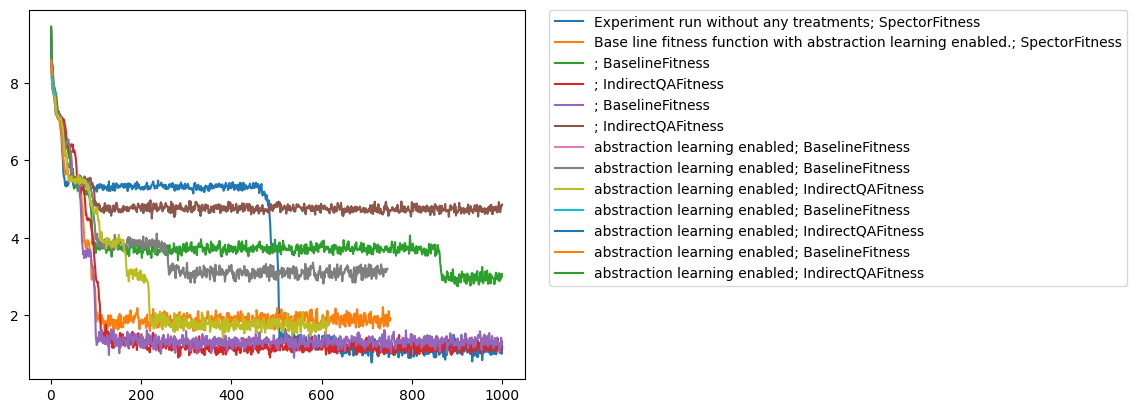

In [18]:
experiment_ids = experiments["experiment_id"].unique()
legend = []

ax = plt.subplot()

for experiment_id in experiment_ids:
    description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()
    fitness = experiments.loc[experiments["experiment_id"] == experiment_id]["fitness"].tolist()[0].strip()
    
    legend.append(f"{description}; {fitness}")
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]

    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])

print("Development of mean fitness values:")
plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Print the best gate sequence of each experiment

In [19]:
for i, experiment in experiments.iterrows():
    print(f"\nExperiment Id: {experiment['experiment_id']}")
    print(f"\tDescription: {experiment['description']}")
    print(f"\tFitness Function: {experiment['fitness']}")
    print(f"\tLast commit id: {experiment['last_commit_id']}")

    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment["experiment_id"]]
    last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
    
    print(f"\tBest fitness value: {last_fitness_row['best_fitness_value'].tolist()[0]}")
    print(f"\tBest chromosome: {last_fitness_row['best_chromosome'].tolist()[0]}")



Experiment Id: grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f8d669
	Description:  Experiment run without any treatments
	Fitness Function: SpectorFitness
	Last commit id:  8990c9f37155b5689eaad409ca26e09c490563bd
	Best fitness value: 0.00017
	Best chromosome:  [id(target=1), id(target=1), id(target=1), id(target=0), id(target=2), id(target=1), id(target=0), rx(theta=1.5007794795390148,target=2), crx(theta=-2.2631071926725865,control=2,target=0), id(target=0), x(target=0), id(target=2), id(target=0), id(target=2), id(target=2), id(target=2), h(target=1), id(target=1), swap(target1=0,target2=1), id(target=1), id(target=0), oracle(target1=1,target2=2,target3=0), ry(theta=-2.1560950555086276,target=1), cry(theta=3.141592653589793,control=2,target=0), oracle(target1=2,target2=1,target3=0), h_layer(), swap(target1=1,target2=0), ccx(control1=0,control2=1,target=2), id(target=2), y_layer()]

Experiment Id: grover_3qubits_8ea564a1-9540-4f2a-91c6-5b75a734f852
	Description:  Base line fitness fu

IndexError: list index out of range